<a href="https://colab.research.google.com/github/dattaayon7/Emotion-Analysis/blob/main/EEG_Signal_based_Emotion_Monitoring_of_Video_Gamers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
from scipy.signal import cheby1,freqz
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
! pip install eeg-filters

In [87]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
dataset = pd.read_csv("/content/drive/MyDrive/Project/S01G1AllRawChannels.csv.zip")
frame = pd.DataFrame(dataset)

In [89]:
col = ['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', '01', '02', 'P7', 'P8', 'T7', 'T8']
X = pd.DataFrame (frame, columns = col)

In [90]:
  X.head(10)

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,01,02,P7,P8,T7,T8
0,-35.1282,-16.1538,-44.8718,1.79490,44.8716,-1.79490,-5.8975,-3.8462,NaN,NaN,5.89750,7.9487,12.5640,18.2051
1,-32.5642,-22.3079,-47.9487,-11.02560,40.2561,-16.79490,-20.8975,-2.8206,NaN,NaN,20.25610,5.8972,19.2307,4.3591
2,-27.1794,-13.8459,-39.4871,-3.07690,47.1794,-1.79490,-5.8975,-1.5383,NaN,NaN,10.25660,9.7434,17.9485,11.2820
3,-32.0515,-14.6157,-42.3079,-4.35890,42.3076,3.84620,-11.0259,-2.3076,NaN,NaN,3.33300,2.3076,7.4355,10.5127
4,-27.1794,-13.8462,-40.5127,-5.12790,47.1797,0.00000,-15.8975,0.5127,NaN,NaN,10.76900,0.0000,11.7949,11.2822
5,-29.4873,-11.0256,-39.7437,-0.25659,49.9998,0.25659,-7.9485,-2.8206,NaN,NaN,0.76929,5.8972,11.5383,20.2566
6,-34.6155,-19.7437,-43.8462,-9.48730,36.6667,-14.74340,-21.2820,1.7947,NaN,NaN,13.58960,5.3845,13.5896,8.9744
7,-30.7693,-14.3589,-34.8718,-2.05130,44.1025,0.25659,-8.7178,-2.0513,NaN,NaN,8.20510,3.0771,12.8203,11.7949
8,-28.7180,-12.3076,-29.7437,0.00000,44.6152,4.10250,-7.1797,-4.6152,NaN,NaN,0.00000,2.0513,9.2310,13.3335
9,-23.0769,-13.8462,-26.1541,-1.53860,44.6152,-4.10250,-9.2310,-0.5127,NaN,NaN,11.79490,0.5127,16.4102,10.7690


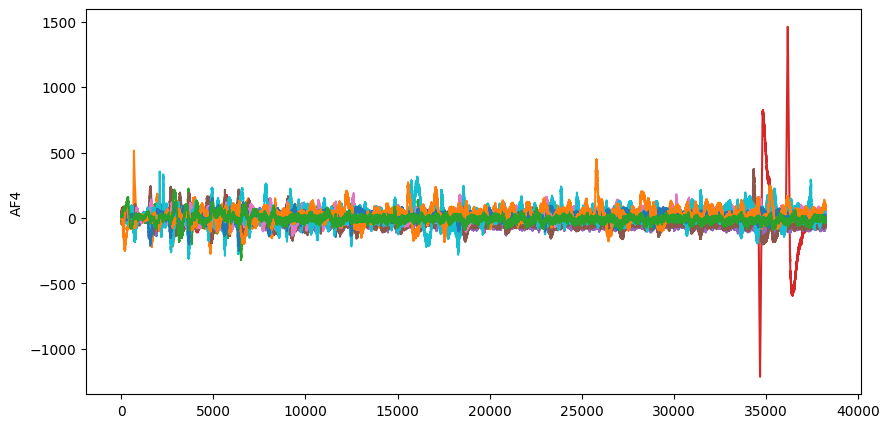

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
column = col[1:]
for i in column:
    sns.lineplot(X[str(i)])



In [23]:
from typing_extensions import final
from scipy.signal import butter, lfilter, filtfilt, cheby1
measurements = 2880
time = 10
sampling_rate  = measurements/time
print(sampling_rate)
nyquist = sampling_rate*0.5

lowcut = 8
highcut = 12
low = lowcut / nyquist
high = highcut / nyquist
b, a = cheby1(3,4, [low, high], btype='bandpass')
final={}

for i in column:
    filtered_sig = lfilter(b, a, X[i].values)
    intermediate_dictionary = {i:filtered_sig}
    final.update(intermediate_dictionary)

filtered_dataframe = pd.DataFrame(final)

288.0


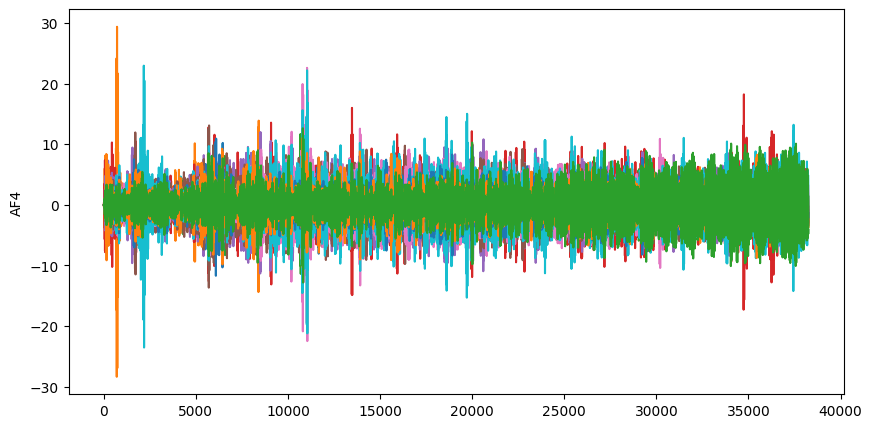

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
for i in column:
    sns.lineplot(filtered_dataframe[i])

In [25]:
pip install tensorflow

In [26]:
pip install keras-layer-normalization

  Preparing metadata (setup.py) ... done
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4654 sha256=bff747dff62bf0a8dc08f759863948ceac3f669167378ce6e49df7232e3808b2
  Stored in directory: /root/.cache/pip/wheels/ed/3a/4b/21db23c0cc56c4b219616e181f258eb7c57d36cc5d056fae9a
Successfully built keras-layer-normalization


In [40]:
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input
from keras.models import Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras.layers import ELU, PReLU, LeakyReLU

In [41]:
from sklearn.model_selection import train_test_split



In [49]:
import numpy as np

In [51]:
X, Y = np.arange(10).reshape((5, 2)), range(5)


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.25, random_state=1)

In [56]:
epochs = 20
num_classes = 1

In [57]:
model = Sequential()
model.add(Conv1D(32,(1), input_shape=(14,1), activation='relu'))
model.add(MaxPooling1D((2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv1D(64, (3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=(2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv1D(128, (3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=(2), padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation= 'relu'))
model.add(Dense(num_classes, activation= 'softmax'))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 32)            64        
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 32)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 7, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             6208      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 7, 64)             0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 64)             0         
 g1D)                                                   

In [61]:
np.set_printoptions(threshold=np.inf)
print(model.get_weights())

[array([[[-0.06657836,  0.03569394,  0.06699201,  0.00087065,
         -0.28383762,  0.30477095,  0.22646749,  0.2591473 ,
          0.05699071,  0.02522498, -0.18382873, -0.10630065,
         -0.01445422, -0.16473499,  0.29597455, -0.05516201,
          0.24540621,  0.31022644, -0.2512033 ,  0.00333747,
          0.41674566,  0.20872527, -0.35202467, -0.35021418,
         -0.34831178,  0.31409436, -0.03595906, -0.2894392 ,
         -0.21886776,  0.24817479,  0.25362742,  0.05459383]]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([[[ 8.72374773e-02, -1.12729035e-01,  4.51291651e-02,
         -1.65164769e-02, -2.24631354e-02,  7.56441206e-02,
          8.45780522e-02,  4.00775373e-02,  5.55837899e-02,
         -1.11020997e-01,  3.16450745e-02, -1.11929178e-02,
         -2.81503201e-02, -1.44326240e-01,  1.16770387e-01,
         -1.26093090e